# Изучение закономерностей, определяющих успешность игр

## Описание проекта

*Цели и задачи проекта*

Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры.

*Данные*

Исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах (Xbox или PlayStation) за 2016 г. из открытых источников.

*Описание данных*

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

*План*

- обзор данных, предобработка
- исследовательский анализ данных
- составление портрета пользователя каждого региона
- проверка гипотез
- общий вывод

## Общая информация

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5
import seaborn as sns
from scipy import stats as st
import os 

In [2]:
pth1 = '/datasets/games.csv' 
pth2 = '/Users/porphyrion/Desktop/PRACTICUM/my_projects/datasets/games.csv' 
if os.path.exists(pth1):     
    data = pd.read_csv(pth1) 
elif os.path.exists(pth2):     
    data = pd.read_csv(pth2) 
else:
    print("Проверьте правильность пути к датасету")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.duplicated().sum()

0

In [5]:
data.shape

(16715, 11)

***Наблюдение.*** Данные содержат 16715 строк, 11 столбцов.

Имеются пропуски в данных с информацией об оценке критиков, оценке пользователей и рейтинге ESRB.

Явных дубликатов нет.

## Предобработка данных

Приведем названия столбцов к нижнему регистру

In [6]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Заменим тип данных в столбцах 'user_score' на числовой, тк он числовой по определению - от 0 до 10. 

В этом столбце встречается аббревиатура tbd (to be determined), оценка пользователей не определена. 

Заменим эти значения на NaN.

In [8]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [9]:
data['user_score'].dtype

dtype('float64')

In [10]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Оценим доли пропусков в колонках.

In [11]:
list_cols = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
for col in list_cols:
  print('-'* 25)
  print(col, data[col].sort_values().unique())
  print(col,': кол-во NaN',data[col].isna().sum(),
        ', процент NaN', round(data[col].isna().sum()/len(data)*100, 2),'%')

-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en colores!' nan]
name : кол-во NaN 2 , процент NaN 0.01 %
-------------------------
platform ['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']
platform : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
year_of_release [1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016.   nan]
year_of_release : кол-во NaN 269 , процент NaN 1.61 %
-------------------------
genre ['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy' nan]
genre : кол-во NaN 2 , процент NaN

Пропуски в колонках genre, name и year_of_release скорее всего вызваны сбоем. Удалим строки с пропусками в колонках name и year_of_release. Их доля небольшая, менее 2%, на дальнейший анализ не повлияет.

In [12]:
data = data.dropna(subset=['name', 'year_of_release'])

Приведем столбец year_of_release к типу целых чисел.

In [13]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [14]:
data['year_of_release'].dtype

dtype('int64')

Пропуски в столбце рейтинга ESRB скорее всего вызваны тем фактом, что эта организация действует только в Северной Америке, а значит в других регионах такой рейтинг может быть неизвестен.

Заполним пропуски категорией 'unknown', чтобы в дальнейшем использовать эти данные для анализа.

In [15]:
data['rating'] = data['rating'].fillna('unknown')

Пропуски в столбцах critic_score и user_score могут быть вызваны отсутствием данных от пользователей и критиков. Оставим пропуски без заполнения, на дальнейший анализ это не повлияет.

In [16]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Добавим столбец с суммарными продажами по всем регионам.

In [17]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [18]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


***Вывод.*** Мы удалили информацию с пропусками в колонках 'genre', 'name' и 'year_of_release'. А также заменили пропуски в столбце 'rating' на категорию 'unknown', чтобы в дальнейшем поанализировать информацию по ним.

## Исследовательский анализ данных

Рассмотрим количество игр, выпущенных по годам.

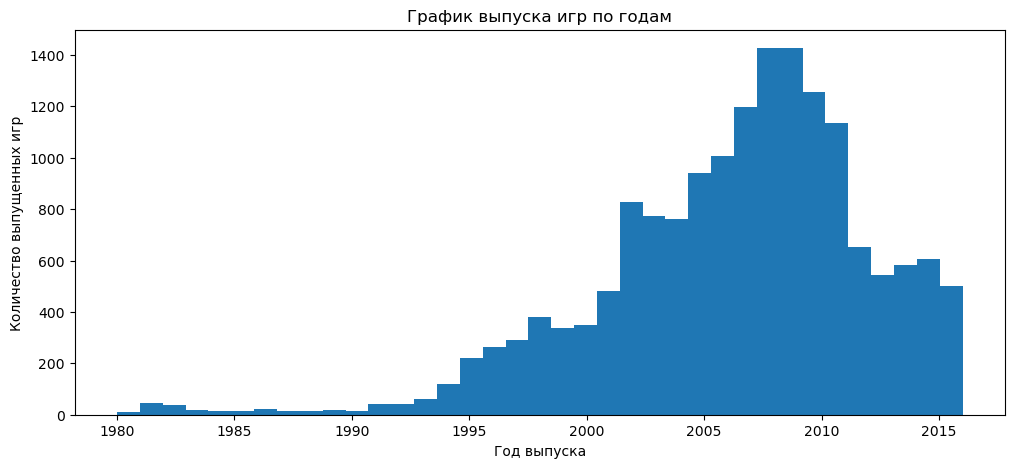

In [19]:
data['year_of_release'].plot(kind='hist', bins=37)
plt.title('График выпуска игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.show()

***Наблюдение.*** Как видно из графика, до 1995 года выпуск игр был критически малым по сравнению с последующими годами.

Посмотрим, как менялись продажи по платформам.

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [20]:
top5_platforms = data.pivot_table(index='platform', values='total_sales', aggfunc=sum).\
sort_values(by='total_sales', ascending=False).head()
top5_platforms

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


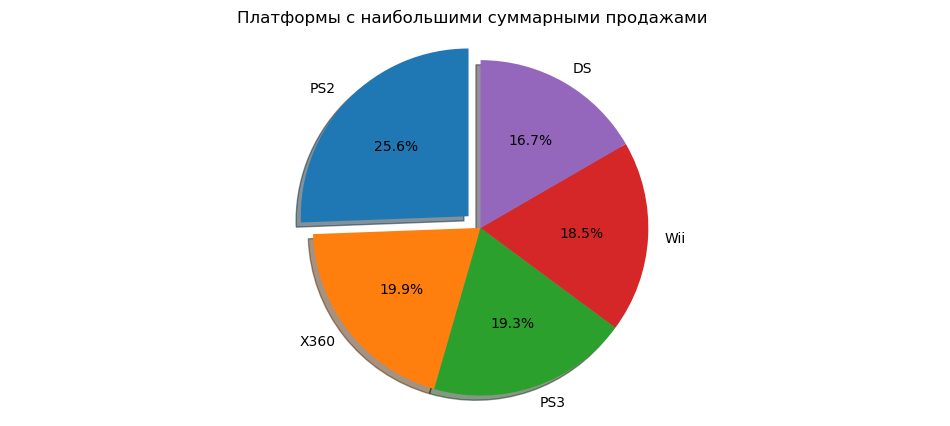

In [21]:
labels = top5_platforms.index
sizes = top5_platforms['total_sales']
explode = (0.1, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Платформы с наибольшими суммарными продажами ')

plt.show()

In [22]:
top5_platforms_data = data[data['platform'].isin(top5_platforms.index)]
top5_platforms_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


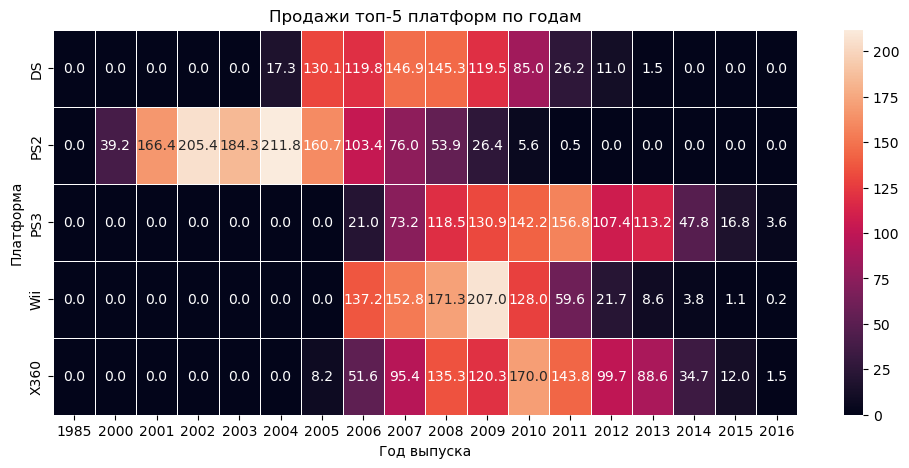

In [23]:
top5_platforms_sales = top5_platforms_data.pivot_table(
                        index='platform', 
                        columns='year_of_release', 
                        values='total_sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(top5_platforms_sales, annot=True, fmt=".1f", linewidths=.5)
plt.title('Продажи топ-5 платформ по годам')
plt.ylabel('Платформа')
plt.xlabel('Год выпуска')
plt.show()

***Наблюдение.*** Из графика видно, за какой характерный срок появляются новые и исчезают старые платформы. В среднем срок жизни платформы составляет 11 лет, из которых на пик продаж приходится 1-2 года в середине жизни.

Выберем данные за актуальный период для дальнейшей работы - c 2012 года по 2016.

In [24]:
filtered_data = data.query('year_of_release >= 2012.0')

In [25]:
filtered_data.shape

(2886, 12)

In [26]:
filtered_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


Изучим, какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

In [27]:
filtered_data['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

In [28]:
filtered_data.pivot_table(index='platform', values='total_sales', aggfunc=sum).\
sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


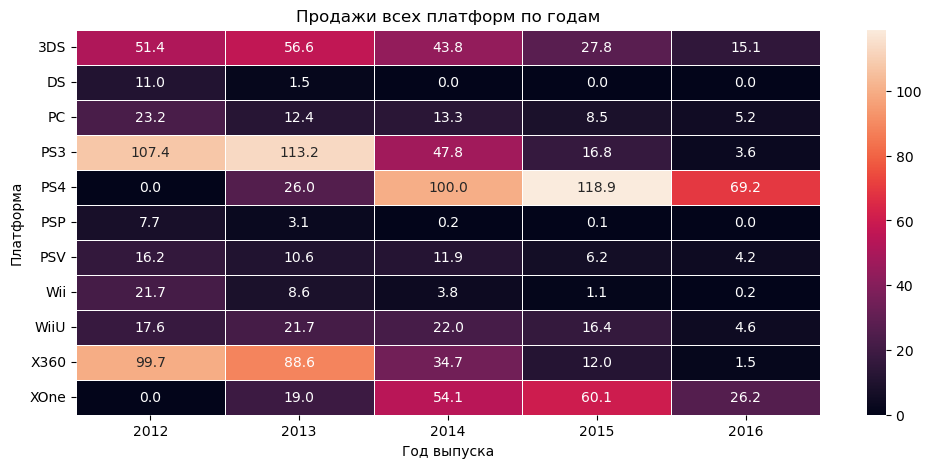

In [29]:
platforms_sales = filtered_data.pivot_table(
                        index='platform', 
                        columns='year_of_release', 
                        values='total_sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platforms_sales, annot=True, fmt=".1f", linewidths=.5)
plt.title('Продажи всех платформ по годам')
plt.ylabel('Платформа')
plt.xlabel('Год выпуска')
plt.show()

***Наблюдение.*** Лидеры продаж за актуальный период - PS4, PS3 и X360.
Однако продажи по X360 и PS3 заметно снизились в последние 2 года.

PS4 и XOne сравнительно молодые платформы и их продажи растут.

Можно отметить также платформы WiiU и 3DS, их продажи падают, однако по-прежнему высоки.

Итак, потенциально прибыльными платформами можно считать 3DS, WiiU, PS4 и XOne

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

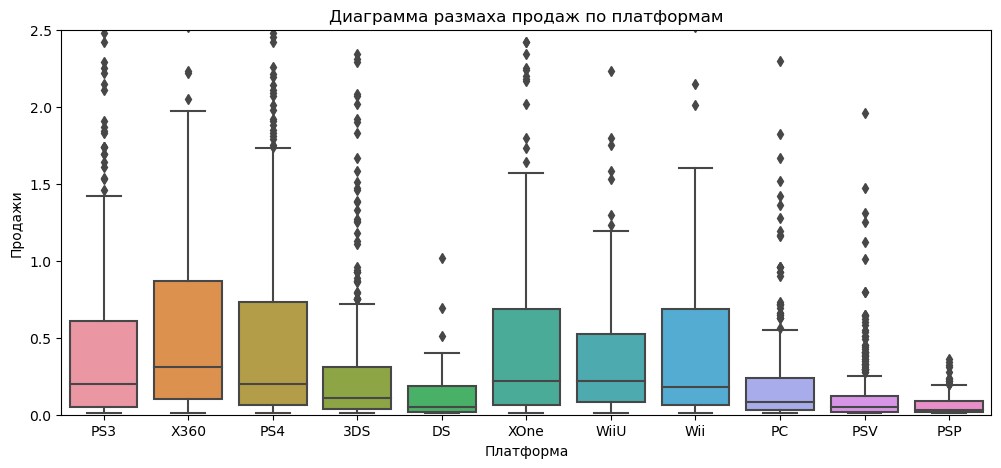

In [31]:
sns.boxplot(x='platform', y='total_sales', data=filtered_data)
plt.ylim(0,2.5)
plt.title('Диаграмма размаха продаж по платформам')
plt.ylabel('Продажи')
plt.xlabel('Платформа')
plt.show()

Увеличим масштаб для наглядности.

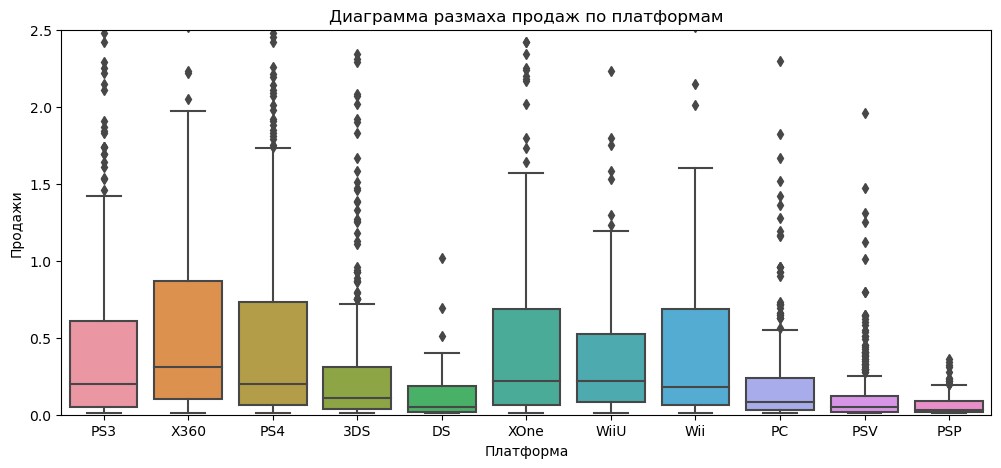

In [31]:
sns.boxplot(x='platform', y='total_sales', data=filtered_data)
plt.ylim(0,2.5)
plt.title('Диаграмма размаха продаж по платформам')
plt.ylabel('Продажи')
plt.xlabel('Платформа')
plt.show()

***Наблюдение.*** Данные не симметричны, имеются выбросы. 

Медиана платформы X360 выше всех остальных.

Медиана лидера продаж DS ниже остальных из топ-5.

Медианы трех потенциально прибыльных платформ WiiU, PS4 и XOne приблизительно равны.

Ниже всех значение медианы у платформы PSP.

Посмотрим, как влияют на продажи внутри популярной платформы X360 отзывы пользователей и критиков. 
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [32]:
X360 = top5_platforms_data.query('platform == "X360"')

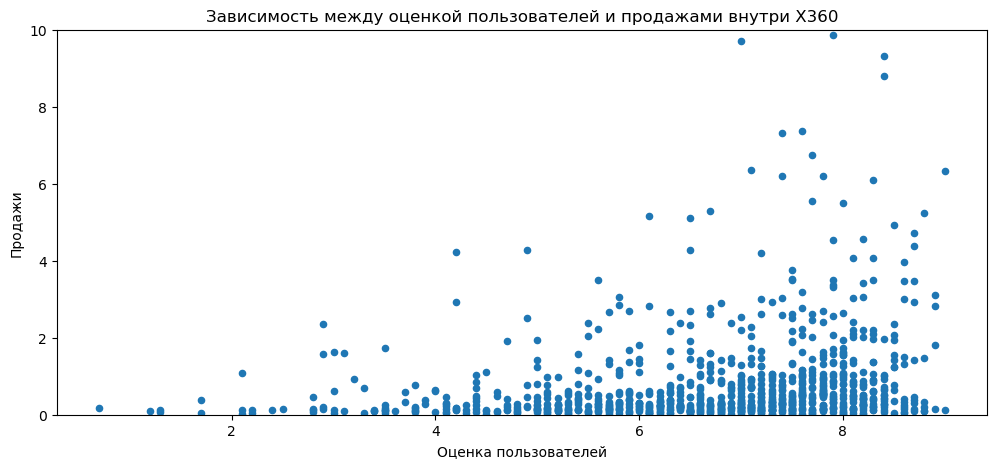

In [33]:
X360.plot(x='user_score', y='total_sales', kind='scatter')
plt.ylim(0,10)
plt.title('Зависимость между оценкой пользователей и продажами внутри X360')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

In [34]:
X360['total_sales'].corr(X360['user_score'])

0.11418661214018049

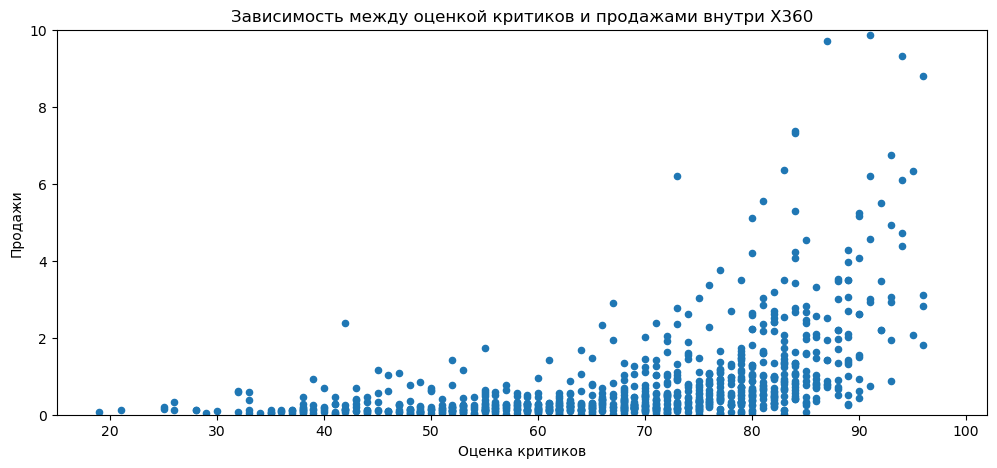

In [35]:
X360.plot(x='critic_score', y='total_sales', kind='scatter')
plt.ylim(0,10)
plt.title('Зависимость между оценкой критиков и продажами внутри X360')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

In [36]:
X360['total_sales'].corr(X360['critic_score'])

0.39286589254006987

***Наблюдение.*** В целом зависимость продаж X360 от отзывов очень слаба. На графике виден небольшой рост продаж при оценке от 4 и выше.

Наблюдается слабая положительная корреляция продаж и оценки критиков, равная 0.36. Особо заметен рост продаж при оценке от 70 и выше.

Сравним выводы с продажами игр на других платформах из топ 5.

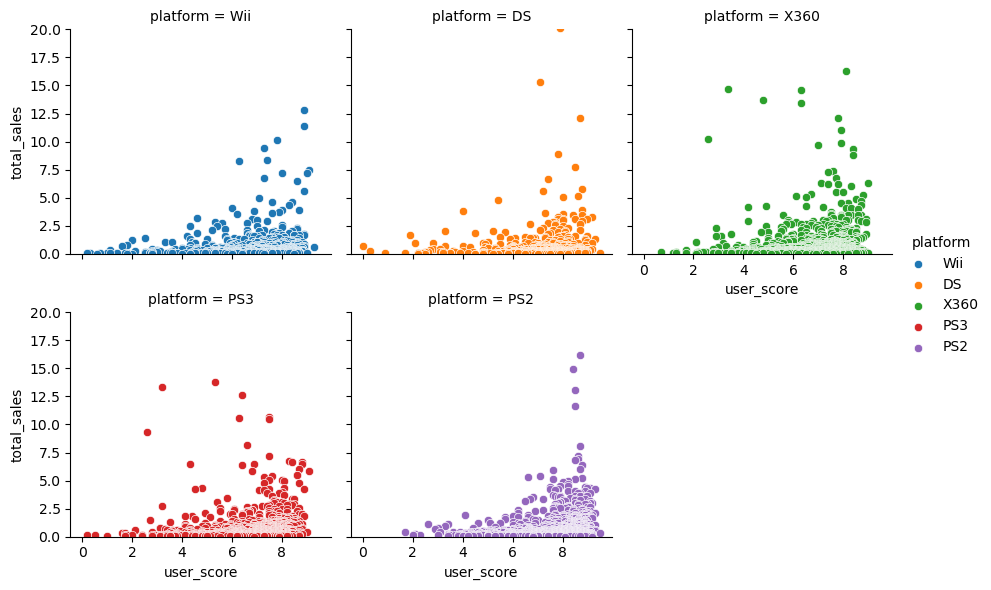

In [37]:
grid = sns.FacetGrid(top5_platforms_data, col='platform', hue='platform', col_wrap=3)
grid.map(sns.scatterplot, 'user_score', 'total_sales')
grid.add_legend()
plt.ylim(0,20)
plt.show()

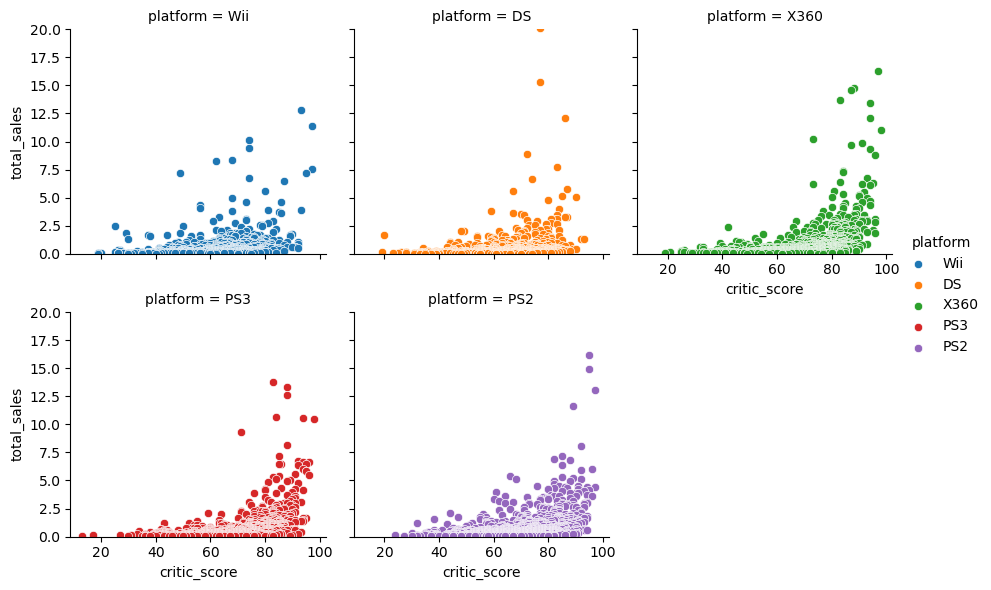

In [38]:
grid = sns.FacetGrid(top5_platforms_data, col='platform', hue='platform', col_wrap=3)
grid.map(sns.scatterplot, 'critic_score', 'total_sales')
grid.add_legend()
plt.ylim(0,20);

In [39]:
Wii = top5_platforms_data.query('platform == "Wii"')

In [40]:
Wii['total_sales'].corr(Wii['user_score'])

0.11283121360773782

In [41]:
Wii['total_sales'].corr(Wii['critic_score'])

0.17790728577594914

На платформе Wii наблюдается очень слабая зависимость продаж от отзывов пользователей и критиков. 

In [42]:
DS = top5_platforms_data.query('platform == "DS"')

In [43]:
DS['total_sales'].corr(DS['user_score'])

0.13087600975844202

In [44]:
DS['total_sales'].corr(DS['critic_score'])

0.23754579854113467

Зависимость продаж DS от отзывов пользователей выражена слабее, чем зависимость от отзывов критиков.

In [45]:
PS3 = top5_platforms_data.query('platform == "PS3"')

In [46]:
PS3['total_sales'].corr(PS3['user_score'])

0.12841562938563028

In [47]:
PS3['total_sales'].corr(PS3['critic_score'])

0.4327589578997134

Наблюдается очень слабая зависимость продаж PS3 от отзывов пользователей. На графике виден небольшой рост продаж при оценке от 4 и выше.

Корреляция продаж и оценки критиков равная ближе к средней. Особо заметен рост продаж при оценке от 60 и выше.

In [48]:
PS2 = top5_platforms_data.query('platform == "PS2"')

In [49]:
PS2['total_sales'].corr(PS2['user_score'])

0.17505502770383727

In [50]:
PS2['total_sales'].corr(PS2['critic_score'])

0.39253647544509035

Зависимость продаж PS2 от отзывов пользователей видна при оценке от 4 и выше, корреляция очень слабая.

Наблюдается слабая положительная корреляция продаж и оценки критиков, равная 0.39. Особо заметен рост продаж при оценке от 60 и выше.

***Наблюдение.*** Зависимость продаж от оценок критиков заметно сильнее, чем от оценок пользователей, однако корреляция слабая. По всем пяти платформам-лидерам продаж наблюдается значительный рост глобальных продаж при оценке критиков от 60 и выше. 

Посмотрим на общее распределение игр по жанрам. Выделим самые прибыльные жанры, а так же жанры с высокими и низкими продажами.

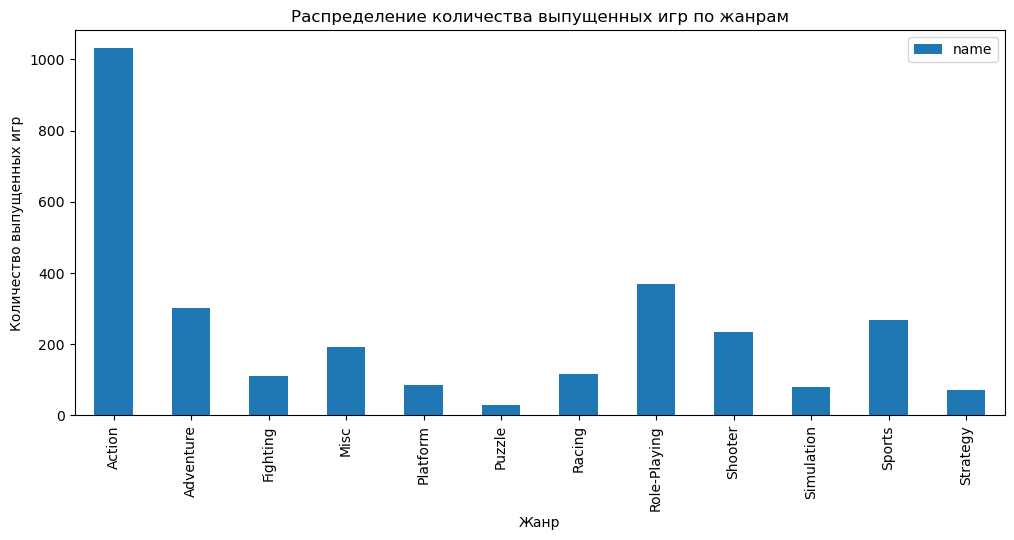

In [51]:
filtered_data.pivot_table(index='genre', values='name', aggfunc='count').\
plot(
    title='Распределение количества выпущенных игр по жанрам',
    xlabel='Жанр',
    ylabel='Количество выпущенных игр',
    kind='bar');

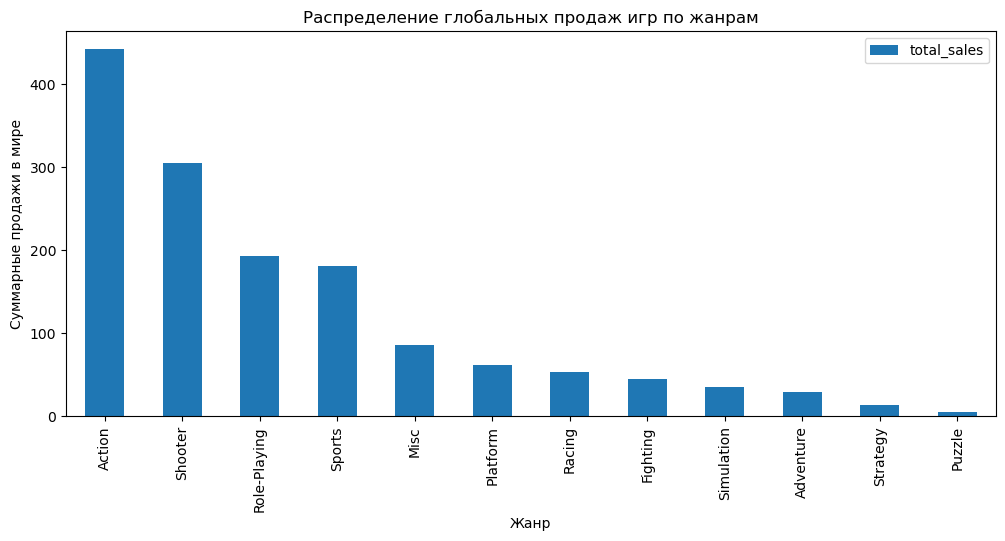

In [52]:
filtered_data.pivot_table(index='genre', values='total_sales', aggfunc='sum').\
sort_values(by='total_sales', ascending=False).\
plot(
    title='Распределение глобальных продаж игр по жанрам',
    xlabel='Жанр',
    ylabel='Суммарные продажи в мире',
    kind='bar');

Добавим сравнение медианных продаж по жанрам, чтобы выделить стабильных лидеров.

In [53]:
top5_genre = filtered_data.pivot_table(index='genre', values='total_sales', aggfunc='median').\
sort_values(by='total_sales', ascending=False).head()
top5_genre

,total_sales
genre,
Shooter,0.44
Sports,0.24
Platform,0.21
Role-Playing,0.14
Racing,0.14


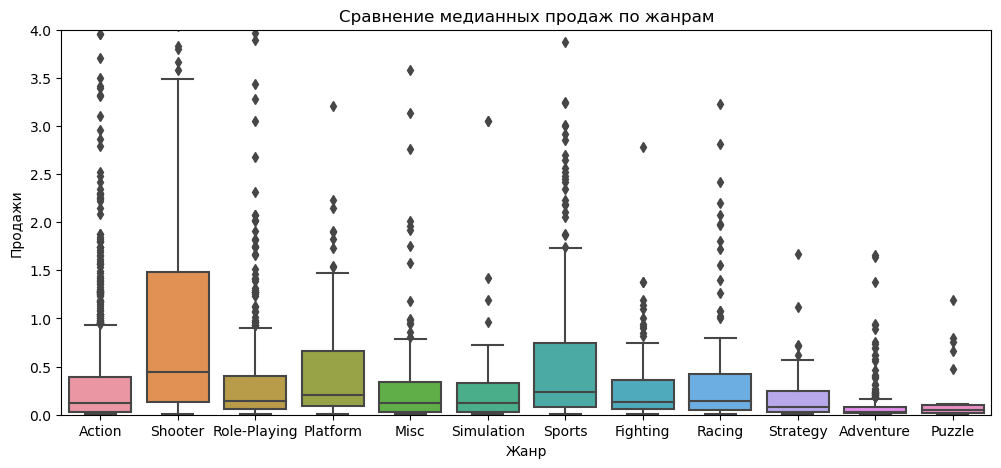

In [54]:
sns.boxplot(x='genre', y='total_sales', data=filtered_data)
plt.ylim(0,4)
plt.title('Сравнение медианных продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.show()

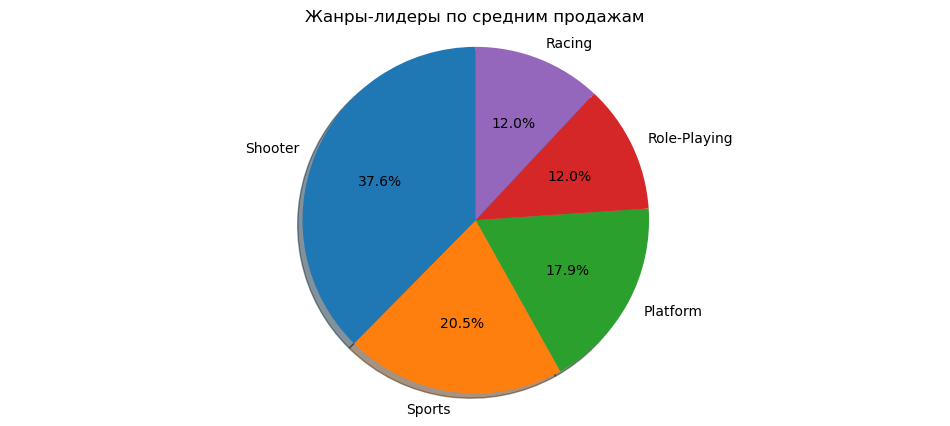

In [55]:
labels = top5_genre.index
sizes = top5_genre['total_sales']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Жанры-лидеры по средним продажам')

plt.show()

***Наблюдение.*** Самыми прибыльными жанрами можно считать Shooter и Sports. 

По количеству выпускаемых игр заметно лидирует Action.

Жанры с самыми низкими средними продажами - Adventure и Puzzle.

***Вывод.*** 
- До 1995 года выпуск игр был критически малым по сравнению с последующими годами.
- В среднем срок жизни платформы составляет 11 лет, из которых на пик продаж приходится 1-2 года в середине жизни.
- Пятерка платформ-лидеров продаж: PS2, X360, PS3, Wii и DS. Медиана платформы X360 выше всех остальных. Медиана лидера продаж DS ниже остальных из топ-5.
- Потенциально прибыльными платформами можно считать 3DS, WiiU, PS4 и XOne. Медианы WiiU, PS4 и XOne приблизительно равны. Медиана 3DS заметно ниже.
- Зависимость продаж от оценок критиков сильнее, чем от оценок пользователей, однако значение корреляции ниже среднего. По всем пяти платформам-лидерам продаж наблюдается значительный рост глобальных продаж при оценке критиков от 60 и выше.
- Самыми прибыльными жанрами можно считать Shooter и Sports. По количеству выпускаемых игр заметно лидирует Action. Жанры с самыми низкими средними продажами - Adventure и Puzzle.

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [56]:
na_sales = filtered_data[['na_sales', 'platform', 'genre', 'rating']]

top5_p_NA = na_sales.\
pivot_table(index='platform', values='na_sales', aggfunc='sum').\
sort_values(by='na_sales', ascending=False).head()

In [57]:
def other_platform (row):
    platform = row['platform']
    if platform not in top5_p_NA.index:
        return 'other'
    return platform
na_sales['platform'] = na_sales.apply(other_platform, axis=1)

In [58]:
NA_p = na_sales.\
pivot_table(index='platform', values='na_sales', aggfunc='sum').\
sort_values(by='na_sales', ascending=False)
NA_p

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
other,90.37
3DS,55.31


In [59]:
eu_sales = filtered_data[['eu_sales', 'platform', 'genre', 'rating']]

top5_p_EU = eu_sales.\
pivot_table(index='platform', values='eu_sales', aggfunc='sum').\
sort_values(by='eu_sales', ascending=False).head()
top5_p_EU

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


In [60]:
def other_platform (row):
    platform = row['platform']
    if platform not in top5_p_EU.index:
        return 'other'
    return platform
eu_sales['platform'] = eu_sales.apply(other_platform, axis=1)

In [61]:
EU_p = eu_sales.\
pivot_table(index='platform', values='eu_sales', aggfunc='sum').\
sort_values(by='eu_sales', ascending=False)
EU_p

,eu_sales
platform,
PS4,141.09
PS3,106.86
other,90.12
X360,74.52
XOne,51.59
3DS,42.64


In [62]:
jp_sales = filtered_data[['jp_sales', 'platform', 'genre', 'rating']]

top5_p_JP = jp_sales.\
pivot_table(index='platform', values='jp_sales', aggfunc='sum').\
sort_values(by='jp_sales', ascending=False).head()

In [63]:
def other_platform (row):
    platform = row['platform']
    if platform not in top5_p_JP.index:
        return 'other'
    return platform
jp_sales['platform'] = jp_sales.apply(other_platform, axis=1)

In [64]:
JP_p = jp_sales.\
pivot_table(index='platform', values='jp_sales', aggfunc='sum').\
sort_values(by='jp_sales', ascending=False)
JP_p

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
other,19.49
PS4,15.96
WiiU,13.01


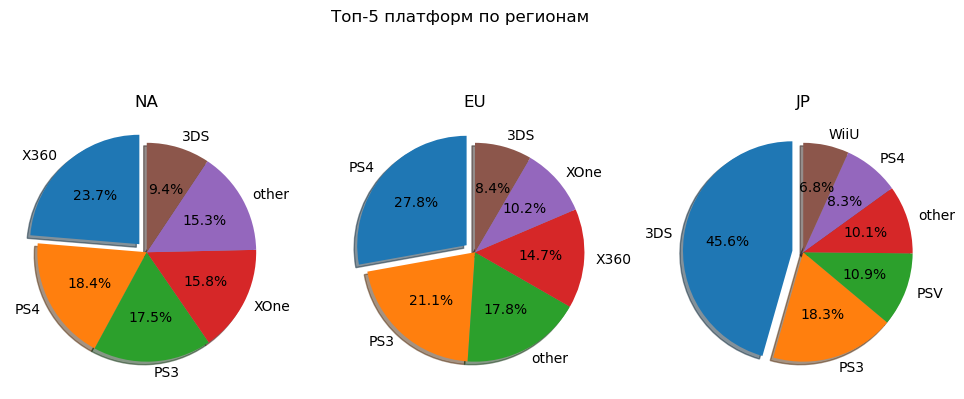

In [65]:
fig, ax = plt.subplots(1,3)
fig.suptitle('Топ-5 платформ по регионам')
ax[0].pie(NA_p['na_sales'], labels=NA_p.index, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=[0.1,0,0,0,0,0]) 
ax[0].set_title('NA')

ax[1].pie(EU_p['eu_sales'], labels=EU_p.index, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=[0.1,0,0,0,0,0]) 
ax[1].set_title('EU')

ax[2].pie(JP_p['jp_sales'], labels=JP_p.index, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=[0.1,0,0,0,0,0]) 
ax[2].set_title('JP')

plt.show()

***Наблюдение.*** В Северной Америке и Европе пятерка платформ-лидеров продаж одинакова: X360, PS3, XOne, PS4, 3DS.

На Северную Америку приходится бОльшая доля продаж, чем на Европу, что объяснимо бОльшим количеством пользователей в этом регионе.

В Японии в пятерку лидеров попали так же PS4, PS3 и 3DS, как и в других двух регионах. Можно отметить, что платформа 3DS пользовалась особой популярностью в Японии и занимает первое место в рейтинге, тогда как в других регионах она лишь на пятом месте.

Также в Японии популярными являются платформы PSV и WiiU.

In [66]:
top5_g_NA = na_sales.\
pivot_table(index='genre', values='na_sales', aggfunc='sum').\
sort_values(by='na_sales', ascending=False).head()

In [67]:
def other_genre (row):
    genre = row['genre']
    if genre not in top5_g_NA.index:
        return 'other'
    return genre
na_sales['genre'] = na_sales.apply(other_genre, axis=1)

In [68]:
NA_g = na_sales.\
pivot_table(index='genre', values='na_sales', aggfunc='sum').\
sort_values(by='na_sales', ascending=False)
NA_g

,na_sales
genre,
Action,177.84
Shooter,144.77
other,84.64
Sports,81.53
Role-Playing,64.00
Misc,38.19


In [69]:
top5_g_EU = eu_sales.\
pivot_table(index='genre', values='eu_sales', aggfunc='sum').\
sort_values(by='eu_sales', ascending=False).head()

In [70]:
def other_genre (row):
    genre = row['genre']
    if genre not in top5_g_EU.index:
        return 'other'
    return genre
eu_sales['genre'] = eu_sales.apply(other_genre, axis=1)

In [71]:
EU_g = eu_sales.\
pivot_table(index='genre', values='eu_sales', aggfunc='sum').\
sort_values(by='eu_sales', ascending=False)
EU_g

,eu_sales
genre,
Action,159.34
Shooter,113.47
other,89.10
Sports,69.09
Role-Playing,48.53
Racing,27.29


In [72]:
top5_g_JP = jp_sales.\
pivot_table(index='genre', values='jp_sales', aggfunc='sum').\
sort_values(by='jp_sales', ascending=False).head()

In [73]:
def other_genre (row):
    genre = row['genre']
    if genre not in top5_g_JP.index:
        return 'other'
    return genre
jp_sales['genre'] = jp_sales.apply(other_genre, axis=1)

In [74]:
JP_g = jp_sales.\
pivot_table(index='genre', values='jp_sales', aggfunc='sum').\
sort_values(by='jp_sales', ascending=False)
JP_g

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
other,41.63
Misc,12.86
Simulation,10.41
Fighting,9.44


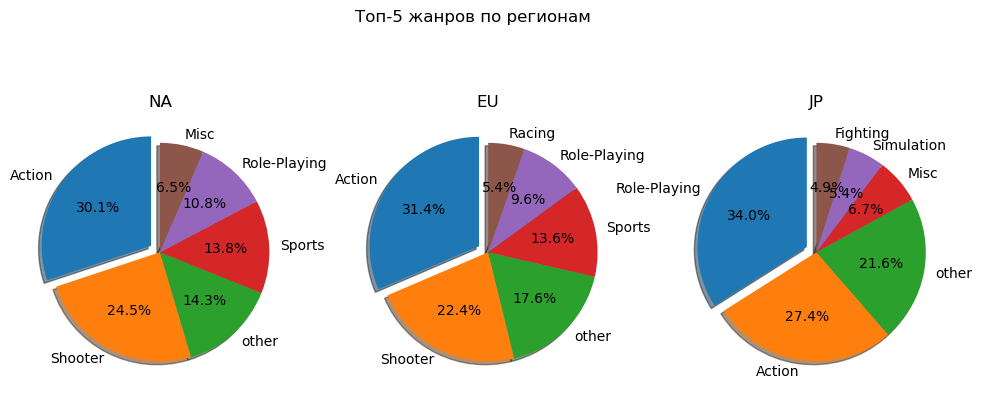

In [75]:
fig, ax = plt.subplots(1,3)
fig.suptitle('Топ-5 жанров по регионам')
ax[0].pie(NA_g['na_sales'], labels=NA_g.index, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=[0.1,0,0,0,0,0]) 
ax[0].set_title('NA')

ax[1].pie(EU_g['eu_sales'], labels=EU_g.index, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=[0.1,0,0,0,0,0]) 
ax[1].set_title('EU')

ax[2].pie(JP_g['jp_sales'], labels=JP_g.index, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=[0.1,0,0,0,0,0]) 
ax[2].set_title('JP')

plt.show()

***Наблюдение.*** В Северной Америке и Европе самыми полулярными являются жанры Action, Shooter, Sports и Role-Playing.

В Европе в топ-5 также попадает Racing, в отличие от Северной Америки, там на пятом месте Misc.

Примечательно, что в Японии Role-Playing является самым популярным жанром. Action и  Misc также попадают в пятерку лидеров в Японии.

В Японии на четвертом и пятом местах по популярности жанры Simulation и Fighting, однако в других регионах эти жанры не попали в топ-5.

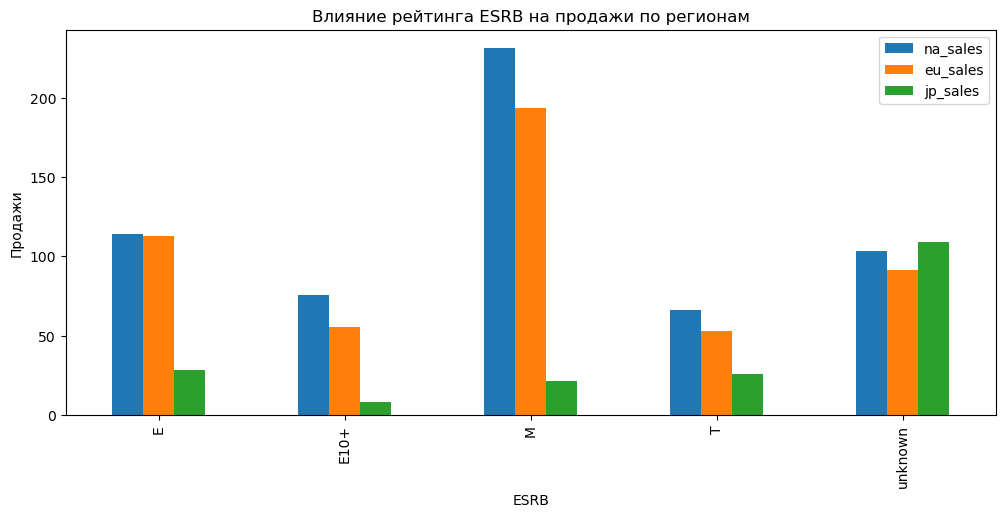

In [76]:
filtered_data[['na_sales', 'eu_sales', 'jp_sales', 'rating']].\
groupby('rating').sum().\
plot(kind='bar')
plt.title('Влияние рейтинга ESRB на продажи по регионам')
plt.xlabel('ESRB')
plt.ylabel('Продажи')
plt.show()

***Наблюдение.*** Можно заметить, как рейтинг ESRB влияет на продажи в Северной Америке: безусловный лидер продаж - игры с рейтингом M (Mature), на втором месте игры для всех E (Everyone),  на 3 месте игры с рейтингом для подростков, и на последнем месте по продажам игры с рейтингом E10+.

Поскольку рейтинг ESRB используется для обязательной маркировки игр только в Северной Америке, мы не можем однозначно толковать результаты его влияния на продажи в других регионах.

***Вывод.*** 
- В Северной Америке и Европе пятерка платформ-лидеров продаж одинакова: X360, PS3, XOne, PS4, 3DS.
- В Японии в пятерку лидеров попали PS3, PS4, 3DS, PSV и WiiU.
- В Северной Америке и Европе самыми полулярными являются жанры Action, Shooter, Sports и Role-Playing.
- В Европе в топ-5 также попадает Racing, в Северной Америке на пятом месте Misc.
- В Японии Role-Playing является самым популярным жанром. Action, Misc, Simulation и Fighting также попадают в пятерку лидеров в Японии.
- Доля продаж в Северной Америке больше, чем в других регионах, что объяснимо численностью населения.
- Рейтинг ESRB влияет на продажи в Северной Америке: лидер продаж - игры с рейтингом M (Mature), на втором месте игры для всех E (Everyone), на 3 месте игры с рейтингом для подростков, и на последнем месте по продажам игры с рейтингом E10+.

## Проверка гипотез

###  Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H_0: Рейтинг (user_score) платформы XOne  = рейтинг (user_score) платформы PC

H_a: Рейтинг (user_score) платформы XOne ≠ рейтинг (user_score) платформы PC

alpha = 0.05

In [77]:
PC = list(filtered_data[filtered_data['platform']=='PC']['user_score'])

In [78]:
XOne = list(filtered_data[filtered_data['platform']=='XOne']['user_score'])

In [79]:
results = st.ttest_ind(XOne,PC,equal_var=False,nan_policy='omit')
alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print("На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) платформы XOne и PC в пользу альтернативной гипотезы.")
else:
    print("На имеющихся данных, на уровне значимости 5% есть основания принять нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) платформы XOne и PC")

0.5489537965134987
На имеющихся данных, на уровне значимости 5% есть основания принять нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) платформы XOne и PC


Сверим со значениями средних показателей пользовательской оценки.

In [80]:
filtered_data.query('platform in ["PC", "XOne"]').\
pivot_table(index='platform', values='user_score')

,user_score
platform,
PC,6.428641
XOne,6.521429


### Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные.

H_0: Рейтинг (user_score) жанра Action = рейтинг (user_score) жанра Sports

H_a: Рейтинг (user_score) жанра Action ≠ рейтинг (user_score) жанра Sports

alpha = 0.05

In [81]:
action = list(filtered_data[filtered_data['genre']=='Action']['user_score'])

In [82]:
sports = list(filtered_data[filtered_data['genre']=='Sports']['user_score'])

In [83]:
results = st.ttest_ind(action,sports,equal_var=False,nan_policy='omit')
alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print("На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.")
else:
    print("На имеющихся данных, на уровне значимости 5% есть основания принять нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports")

4.24307776572644e-20
На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.


Сверим со значениями средних показателей пользовательской оценки.

In [84]:
filtered_data.query('genre in ["Action", "Sports"]').\
pivot_table(index='genre', values='user_score')

,user_score
genre,
Action,6.825048
Sports,5.455897


***Вывод.***
Проведена проверка двух гипотез:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза была сформулирована на основании предположения, что рейтинги равны, то есть средние двух генеральных совокупностей равны между собой. Альтернативная сформулирована противоположно нулевой.

Гипотеза №1 подтверждена. Рейтинги равны.

Гипотеза №2 подтверждена. Рейтинги не равны.

## Вывод

***Поставленная задача*** — отработать принцип работы с данными на примере планирования рекламной кампании для интернет-магазина "Стримчик". Выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Был проведен анализ исторических данных о продажах игр, оценках пользователей и экспертов, жанрах и платформах (Xbox или PlayStation) за 2016 г. из открытых источников. В ходе исследования выявлены следующие особенности.

- Пятерка платформ-лидеров продаж: PS2, X360, PS3, Wii и DS. Медиана платформы X360 выше всех остальных. Медиана лидера продаж DS ниже остальных из топ-5.
- Потенциально прибыльными платформами можно считать 3DS, WiiU, PS4 и XOne. Медианы WiiU, PS4 и XOne приблизительно равны. Медиана 3DS заметно ниже.
- Самыми прибыльными жанрами можно считать Shooter и Sports. По количеству выпускаемых игр заметно лидирует Action. Жанры с самыми низкими средними продажами - Adventure и Puzzle.
- Зависимость продаж от оценок критиков заметно сильнее, чем от оценок пользователей. По всем пяти платформам-лидерам продаж наблюдается значительный рост глобальных продаж при оценке критиков от 60 и выше.
- В Северной Америке и Европе пятерка платформ-лидеров X360, PS3, XOne, PS4, 3DS.
- В Японии в пятерку лидеров попали PS3, PS4, 3DS, PSV и WiiU.
- В Северной Америке и Европе самыми полулярными являются жанры Action, Shooter, Sports и Role-Playing. В Европе в топ-5 также попадает Racing, в Северной Америке на пятом месте Misc.
- В Японии Role-Playing является самым популярным жанром. Action, Misc, Simulation и Fighting также попадают в пятерку лидеров в Японии.
- Доля продаж в Северной Америке больше, чем в других регионах, что объяснимо численностью населения.
- Рейтинг ESRB влияет на продажи в Северной Америке: лидер продаж - игры с рейтингом M (Mature), на втором месте игры для всех E (Everyone), на 3 месте игры с рейтингом для подростков, и на последнем месте по продажам игры с рейтингом E10+.

По результатам проверки гипотез сделаны следующие выводы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action и Sports разные.

По результатам исследования, можно назвать следующие направления для рекламных кампаний:

- Северная Америка и Европа: платформа XOne, жанр Sports, рейтинг ESRB "M".
- Япония: платформа PS3, жанр Action.